### Criação do RFM e o LTV com a bse de dados online retail

In [1]:
#import library
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### Primeiro vamos mudar o diretório para onde estão salvo os dados e depois carrega-los

In [2]:
os.chdir("C:\\Github\\Python\\LTV\\Dataset")
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Vamos ver a quantidade de linhas e colunas que a base de dados possui
df.shape

(541909, 8)

In [4]:
#Vamos explorar os dados fazendo uma análise descritiva para os dados númericos e ver o que temos
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Observamos que temos quantidade e preços unitário com vaores negativos. Vamos tentar entender o porque desses valores

In [5]:
vl_ng = df.loc[df['Quantity'] < 0]
vl_ng

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


##### Pode-se perceber que os valores negativos estão atrelados ao InvoiceNo que começa com a letra C, indicando cancelamento, com isso iremos excluir esses valores

In [6]:
df = df.loc[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


##### Mesmo aós tirar os valores negativos ainda temos preços com valores negativos. Fazendo uma análise rápida os valores negativos possue a letrs A na frente do InvoiceNo, nesse caso não sei o que representa mas, para o estudo não faz sentido. Por esse motivo irei excluir também.

In [7]:
df = df.loc[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


##### Agora sim temos valores que fazem sentido. Farei algumas análises para entender o dataset
##### Vou analisar primeiro qual o país com mais vendas.

Text(0.5, 1.0, 'Número de vendas por País')

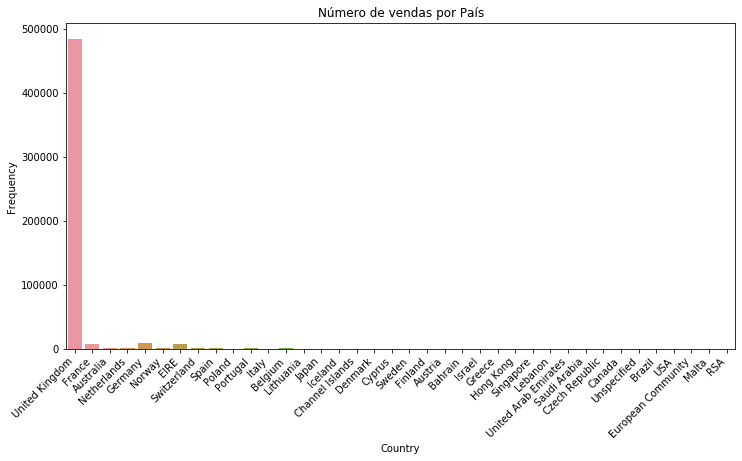

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Country', data = df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Número de vendas por País')

##### Pelo gráfico acima a maior quantidade de compras são no Reino Unido. Para o estudo vou utilizar apenas essa massa de dados.

In [9]:
df_uk = df.loc[df['Country'] == 'United Kingdom']
df_uk.shape

(485123, 8)

In [75]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID,year,month
count,485123.000000,485123.000000,354321.000000,485123.000000,485123.000000
mean,9.610738,3.849679,15552.486392,2010.919146,7.581661
std,161.904143,34.677371,1594.527150,0.272611,3.519570
min,1.000000,0.001000,12346.000000,2010.000000,1.000000
25%,1.000000,1.250000,14194.000000,2011.000000,5.000000
50%,3.000000,2.100000,15522.000000,2011.000000,8.000000
75%,10.000000,4.130000,16931.000000,2011.000000,11.000000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000


In [96]:
#Quantos consumidores únicos temos?
df_uk['CustomerID'].nunique()

3920

In [82]:
#Aqui já vou criar a quantidade total de cada compra gerou de receita final multiplicando a quantidade vezes o valor do produto
df_uk['Total_Purchase'] = df_uk['Quantity'] * df_uk['UnitPrice']
df_uk.head()

C:\Users\vinic\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,Total_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


In [51]:
# Quantidade de compras por ano no Reino Unido
df_uk.InvoiceDate.dt.year.value_counts()

2011    445899
2010     39224
Name: InvoiceDate, dtype: int64

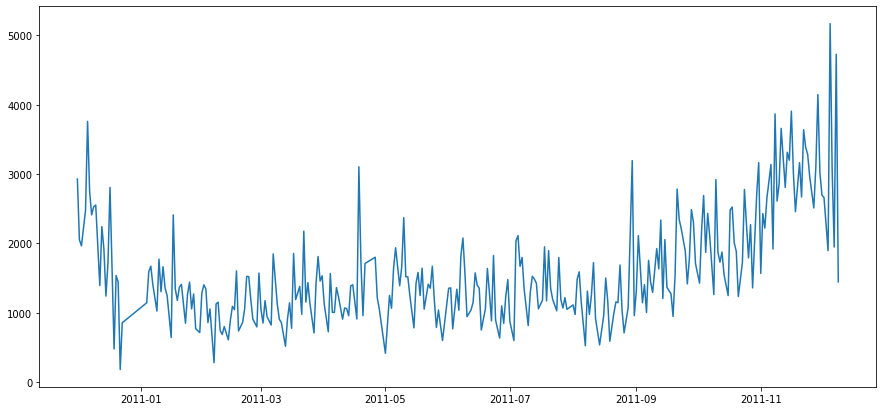

In [67]:
plt.figure(figsize=(15,7))
df_uk.InvoiceDate.dt.date.value_counts().plot()

##### O ano de 2010 começou com a quantidade de compras caindo, depois manteve-se estável em 2011 até setembro e a partir de setembro começou a aumentar a quantidade de vendas

In [94]:
#Valor total de venda por ano
df_uk.groupby('year').agg({'Total_Purchase': 'sum'})

,Total_Purchase
year,
2010,7.482690e+05
2011,8.276953e+06
